In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from scipy.fftpack import dct, idct

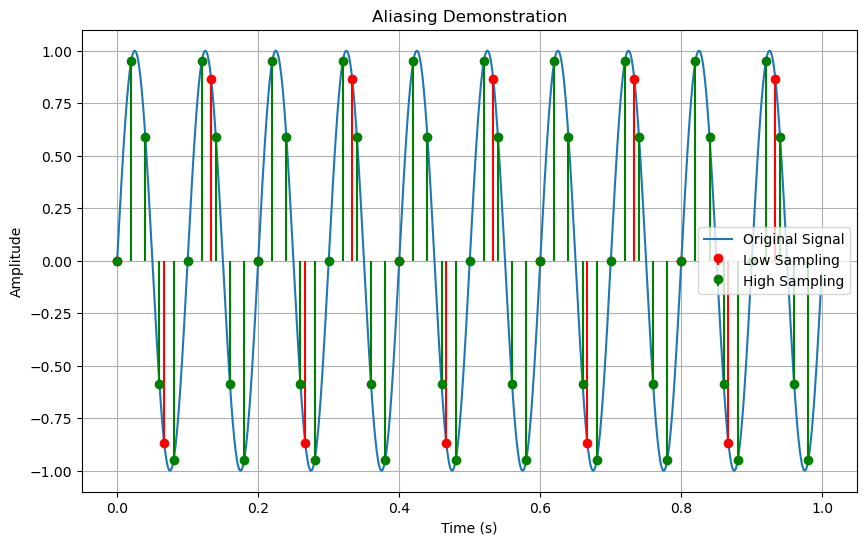

In [2]:
# Original signal parameters
f_signal = 10  # Frequency of the signal (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling parameters
f_sample_low = 15  # Low sampling frequency (Hz)
f_sample_high = 50  # High sampling frequency (Hz)

# Sampling the signal
t_low = np.arange(0, 1, 1 / f_sample_low)
t_high = np.arange(0, 1, 1 / f_sample_high)
samples_low = np.sin(2 * np.pi * f_signal * t_low)
samples_high = np.sin(2 * np.pi * f_signal * t_high)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.stem(t_low, samples_low, linefmt='r-', markerfmt='ro', basefmt=" ", label='Low Sampling')
plt.stem(t_high, samples_high, linefmt='g-', markerfmt='go', basefmt=" ", label='High Sampling')
plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

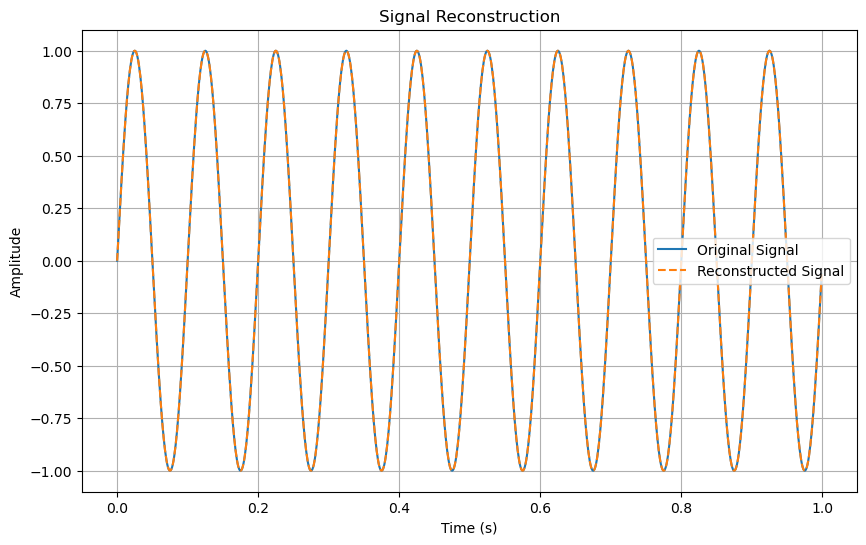

In [7]:
# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_high, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [6]:
# DCT + progorowanie i rekonsuktrja sygnału
def apply_dct(signal: np.ndarray) -> np.ndarray:
    return dct(signal, norm='ortho')

def threshold_coeffs(dct_coeffs: np.ndarray, threshold: float) -> np.ndarray:
    coeffs = dct_coeffs.copy()
    coeffs[np.abs(coeffs) < threshold] = 0
    return coeffs

def reconstruct_from_dct(dct_coeffs_thresholded: np.ndarray) -> np.ndarray:
    return idct(dct_coeffs_thresholded, norm='ortho')

def mse(original: np.ndarray, reconstructed: np.ndarray) -> float:
    return float(np.mean((original - reconstructed) ** 2))

def compression_ratio(original_len: int, dct_coeffs_thresholded: np.ndarray) -> float:
    nonzero = int(np.count_nonzero(dct_coeffs_thresholded))
    if nonzero == 0:
        return float('inf')
    return original_len / nonzero

# Problem 4
original_signal = np.array([10, 20, 30, 40, 50, 60], dtype=float)
thresholds = [10, 20, 30]

dct_signal = apply_dct(original_signal)

results = []
for thr in thresholds:
    compressed_coeffs = threshold_coeffs(dct_signal, thr)
    reconstructed_signal = reconstruct_from_dct(compressed_coeffs)

    cr = compression_ratio(len(original_signal), compressed_coeffs)
    distortion_mse = mse(original_signal, reconstructed_signal)

    results.append({
        "threshold": thr,
        "nonzero_coeffs": int(np.count_nonzero(compressed_coeffs)),
        "compression_ratio": cr,
        "mse": distortion_mse,
        "reconstructed": np.round(reconstructed_signal, 2)
    })

print("Original signal:", original_signal)
print("DCT coeffs (before thresholding):", np.round(dct_signal, 2))
print("\nResults (Problem 4):")
for r in results:
    print(f"\nThreshold = {r['threshold']}")
    print(f"  Non-zero DCT coeffs: {r['nonzero_coeffs']}")
    print(f"  Compression Ratio (CR = N/K): {r['compression_ratio']}")
    print(f"  Distortion (MSE): {r['mse']}")
    print(f"  Reconstructed signal: {r['reconstructed']}")


Original signal: [10. 20. 30. 40. 50. 60.]
DCT coeffs (before thresholding): [ 85.73 -41.63   0.    -4.08   0.    -0.8 ]

Results (Problem 4):

Threshold = 10
  Non-zero DCT coeffs: 2
  Compression Ratio (CR = N/K): 3.0
  Distortion (MSE): 2.8846549248157896
  Reconstructed signal: [11.79 18.01 28.78 41.22 51.99 58.21]

Threshold = 20
  Non-zero DCT coeffs: 2
  Compression Ratio (CR = N/K): 3.0
  Distortion (MSE): 2.8846549248157896
  Reconstructed signal: [11.79 18.01 28.78 41.22 51.99 58.21]

Threshold = 30
  Non-zero DCT coeffs: 2
  Compression Ratio (CR = N/K): 3.0
  Distortion (MSE): 2.8846549248157896
  Reconstructed signal: [11.79 18.01 28.78 41.22 51.99 58.21]
